In [1]:
import torch
import matplotlib.pyplot as plt
import os

In [4]:
def load_checkpoint(file_path):
    checkpoint = torch.load(file_path, map_location='cpu')
    return {
        'train_losses': checkpoint['train_losses'],
        'val_losses': checkpoint['val_losses'],
        'val_accs': checkpoint['val_accs'],
        'recalls': checkpoint['recalls'],
        'precisions': checkpoint['precisions'],
        'rocs': checkpoint['rocs'],
        'epoch': checkpoint['epoch']
    }

checkpoint_path_512 = r"C:\Users\Gert\repos\CS2_cheat_detection\Transformer\checkpoints\model_512_epoch_99.pth"
checkpoint_path_1024 = r"C:\Users\Gert\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_epoch_99.pth"
checkpoint_path_1024_seed41 = r"C:\Users\Gert\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_seed41_epoch_39.pth"
checkpoint_path_1024_seed43 = r"C:\Users\Gert\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_seed43_epoch_39.pth"
metrics_512 = load_checkpoint(checkpoint_path_512)
metrics_1024 = load_checkpoint(checkpoint_path_1024)
metrics_1024_seed43 = load_checkpoint(checkpoint_path_1024_seed43)
metrics_1024_seed41 = load_checkpoint(checkpoint_path_1024_seed41)

C:\Users\Gert\AppData\Local\Temp\ipykernel_7428\317001505.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file_path, map_location='cpu')


In [5]:
def plot_metrics(metrics):
    epochs = list(range(1, len(metrics['train_losses']) + 1))

    plt.figure(figsize=(15, 10))

    # 1. Loss
    plt.subplot(2, 3, 1)
    plt.plot(epochs, metrics['train_losses'], label='Train Loss')
    plt.plot(epochs, metrics['val_losses'], label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # 2. Accuracy
    plt.subplot(2, 3, 2)
    plt.plot(epochs, metrics['val_accs'], label='Val Accuracy', color='green')
    plt.title("Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # 3. Recall
    plt.subplot(2, 3, 3)
    plt.plot(epochs, metrics['recalls'], label='Recall', color='orange')
    plt.title("Recall")
    plt.xlabel("Epoch")
    plt.ylabel("Recall")
    plt.legend()

    # 4. Precision
    plt.subplot(2, 3, 4)
    plt.plot(epochs, metrics['precisions'], label='Precision', color='purple')
    plt.title("Precision")
    plt.xlabel("Epoch")
    plt.ylabel("Precision")
    plt.legend()

    # 5. ROC AUC
    plt.subplot(2, 3, 5)
    plt.plot(epochs, metrics['rocs'], label='ROC AUC', color='red')
    plt.title("ROC AUC")
    plt.xlabel("Epoch")
    plt.ylabel("ROC AUC")
    plt.legend()

    plt.tight_layout()

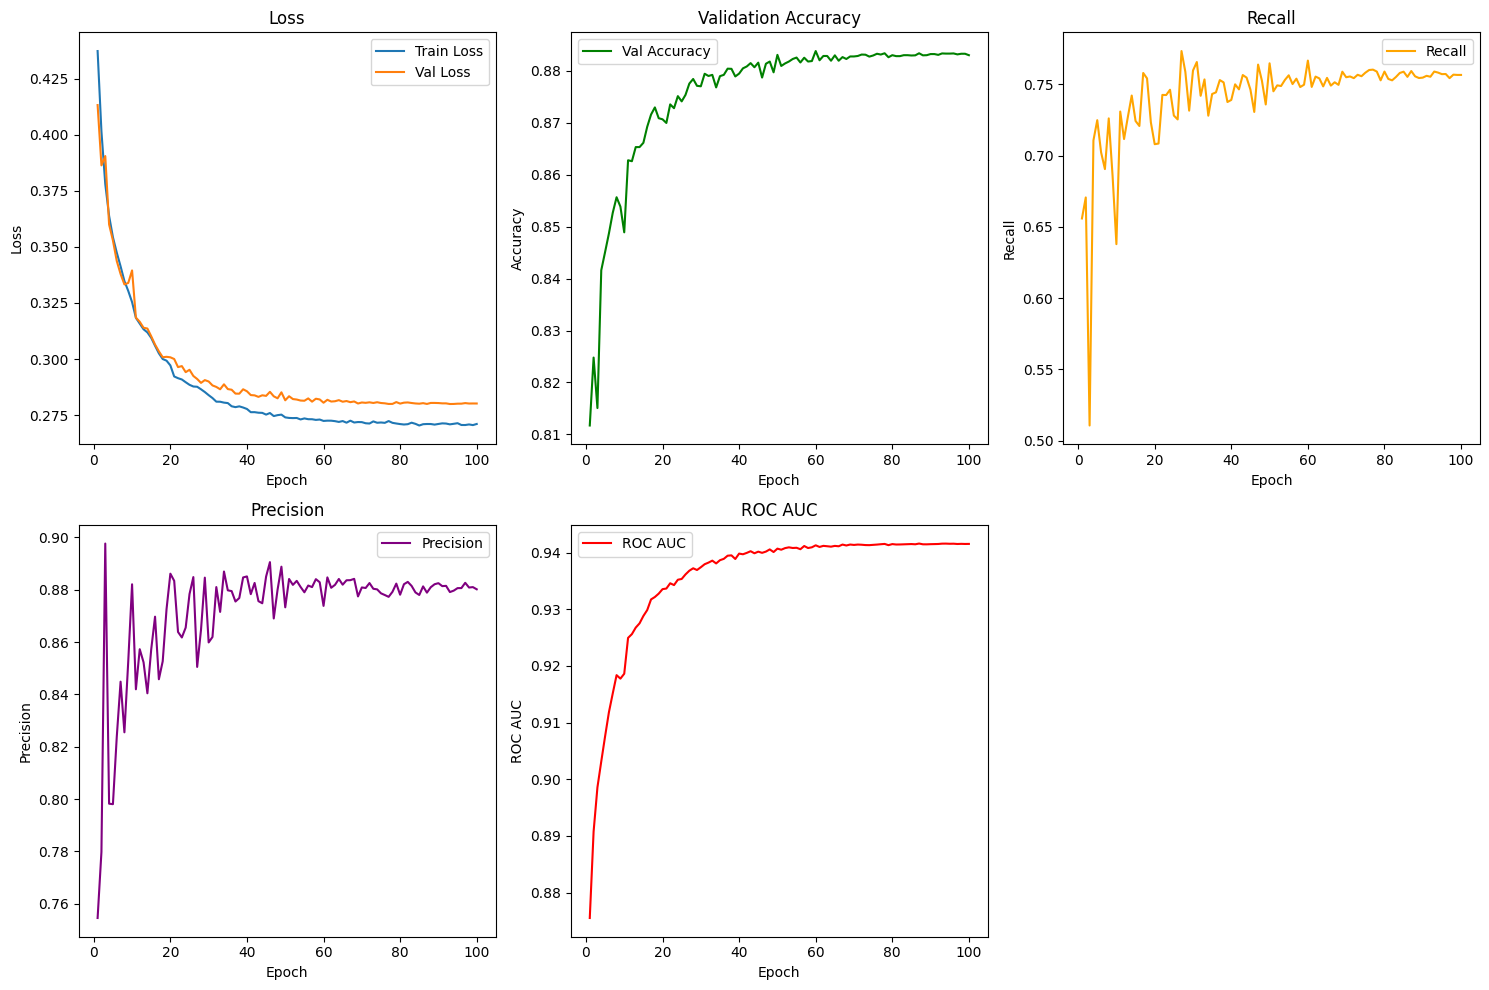

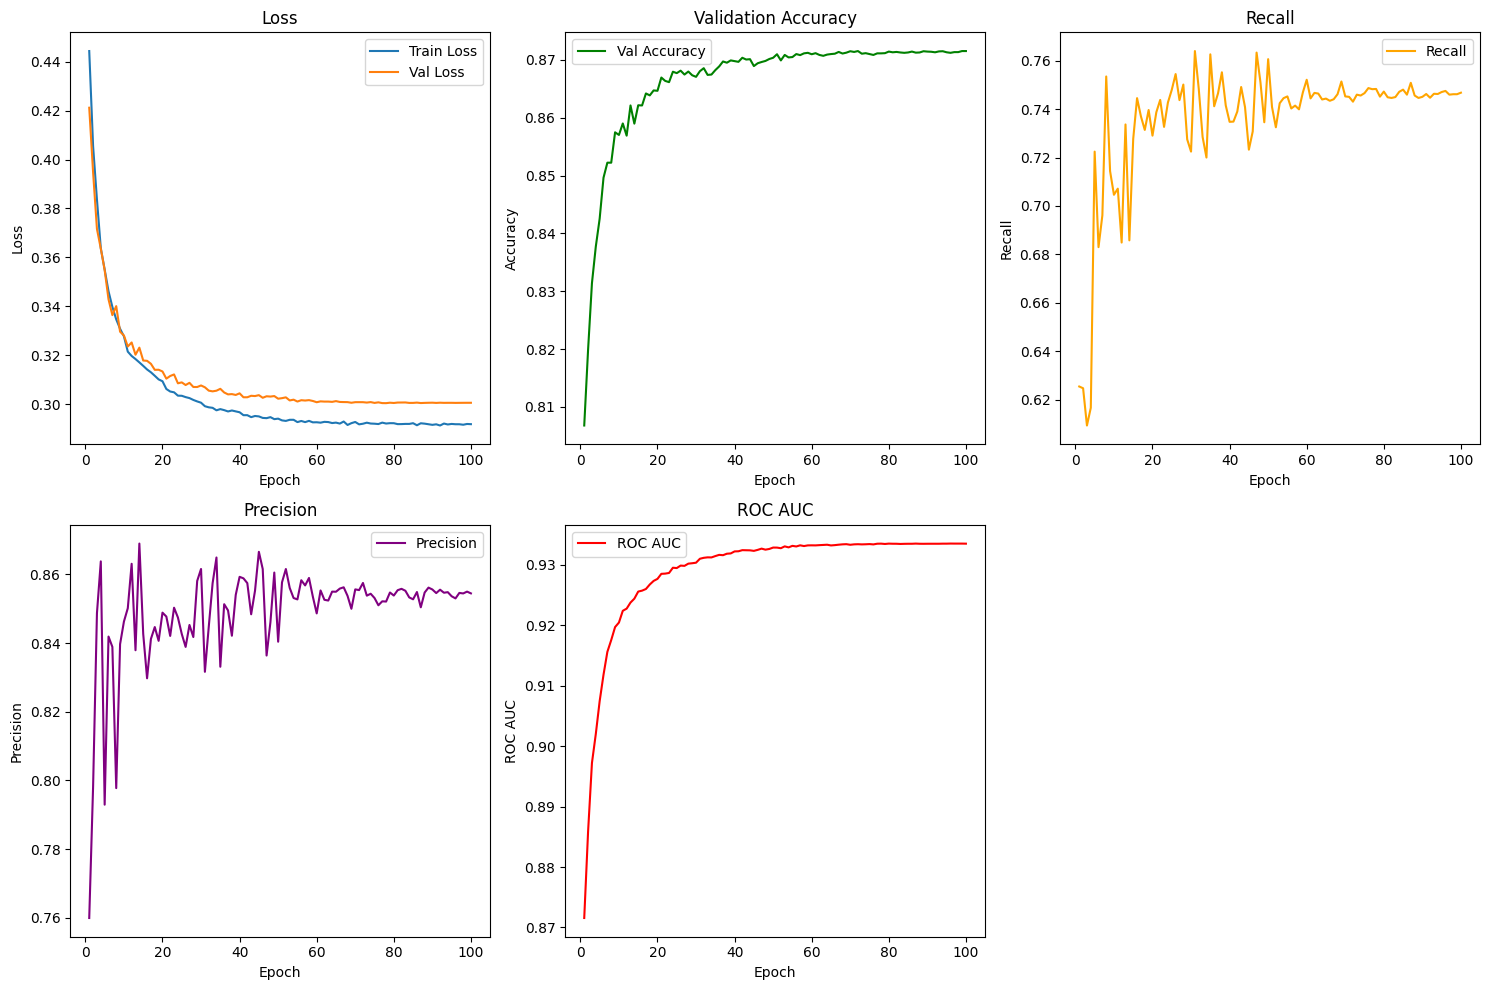

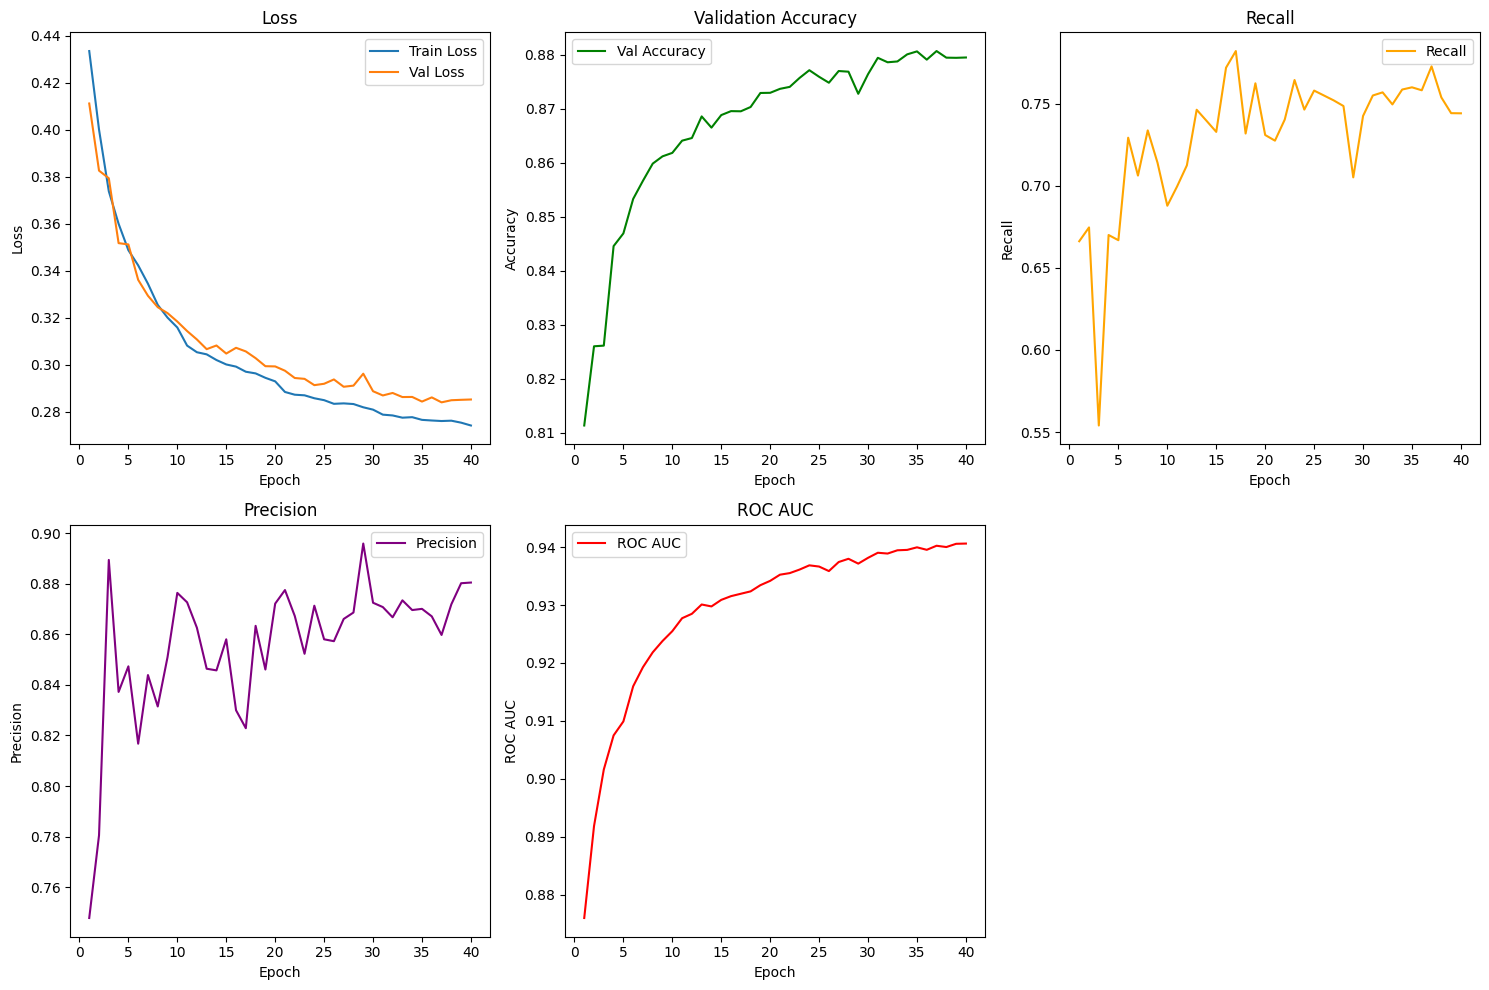

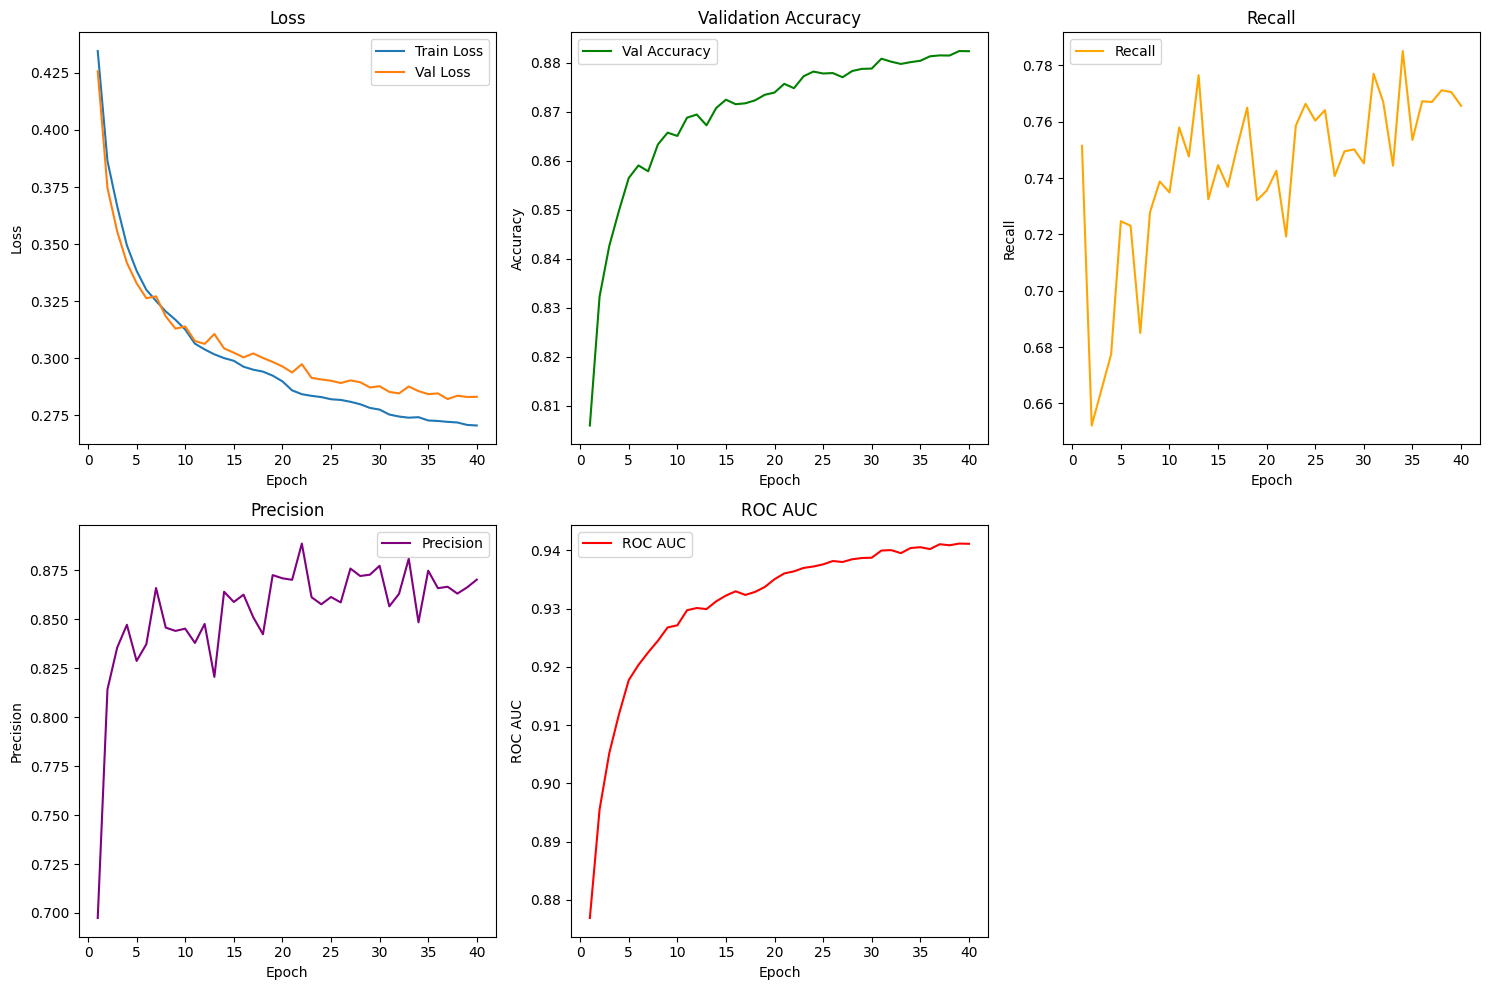

In [6]:
plot_metrics(metrics_1024)
plot_metrics(metrics_512)
plot_metrics(metrics_1024_seed41)
plot_metrics(metrics_1024_seed43)